## hur - Relative humidity

In [76]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

import skimage.measure as skm
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [77]:
from plotFuncs import *

### one dataset

In [78]:
variable = 'hur'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 # does not have hur variable
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    # 'historical',
    'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:hur, dataset:GFDL-CM3, experiment:rcp85, resolution:regridded


<xarray.Dataset>
Dimensions:  (plev: 23, time: 360, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 2070-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, plev, lat, lon) float32 ...

In [79]:
hur_day = ds[variable]
hur_day

<xarray.DataArray 'hur' (time: 360, plev: 23, lat: 22, lon: 128)>
[23316480 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 2070-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

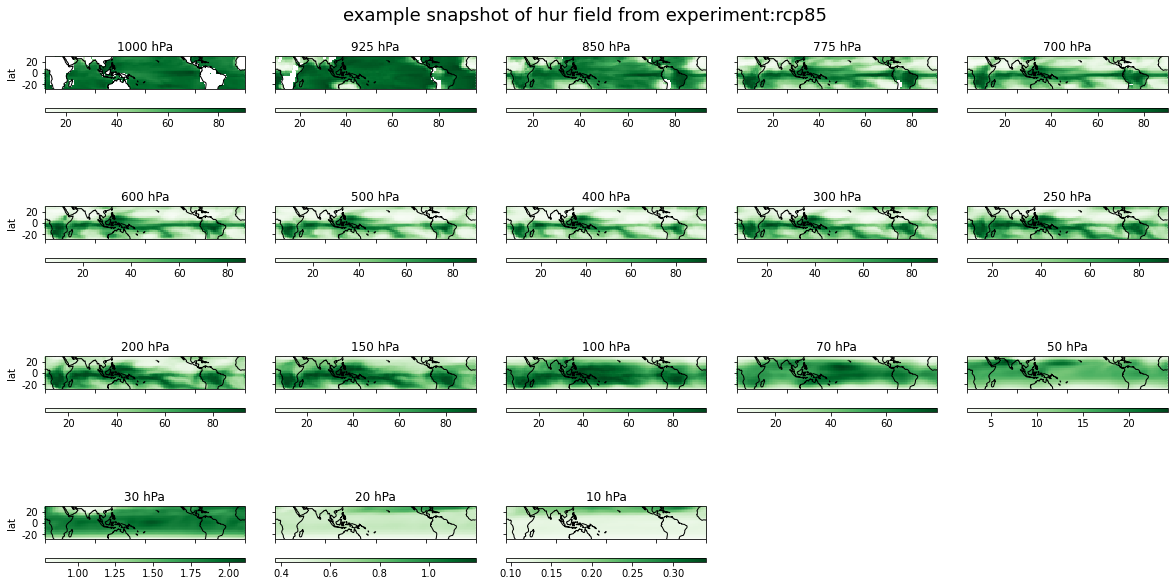

In [80]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6125)
scene = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])[variable].isel(time=0).sel(plev = slice(1500e2, 10e2))

for i, plev in enumerate(scene['plev']):
    ax= fig.add_subplot(5,5,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


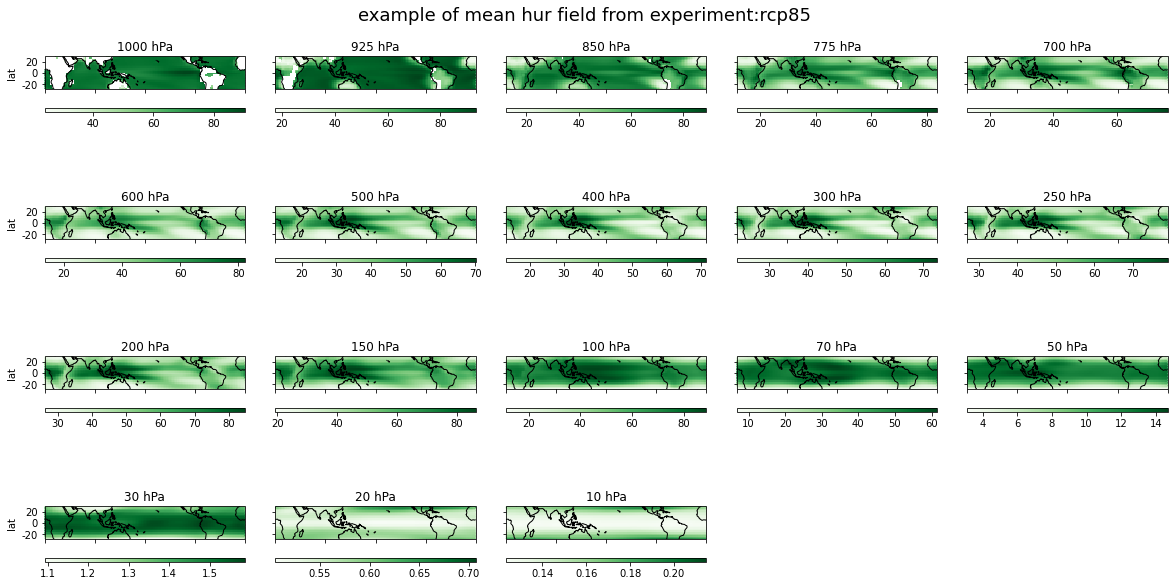

In [81]:
fig= plt.figure(figsize=(20,25))

title = 'example of mean {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6125)
scene = get_dsvariable(variable, datasets[0], experiments[0] ,home, resolutions[0])[variable].mean(dim='time').sel(plev = slice(1500e2, 10e2))

for i, plev in enumerate(scene['plev']):
    ax= fig.add_subplot(5,5,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        


    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


In [82]:
ds['hur']

<xarray.DataArray 'hur' (time: 360, plev: 23, lat: 22, lon: 128)>
[23316480 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 2070-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

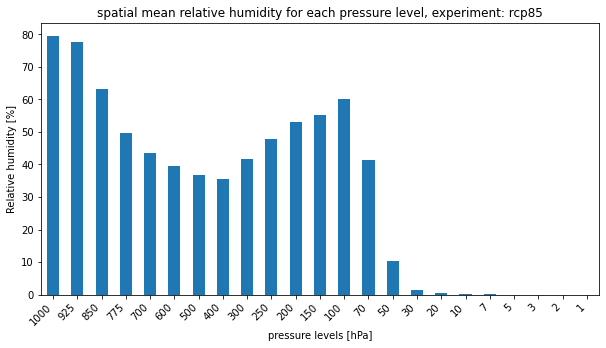

In [83]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
ds['hur'].weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean relative humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hur'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

In [84]:
hur_rcp = get_dsvariable(variable, datasets[0], experiment = 'rcp85', resolution=resolutions[0])['hur'] 
hur_rcp

<xarray.DataArray 'hur' (time: 360, plev: 23, lat: 22, lon: 128)>
[23316480 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 2070-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

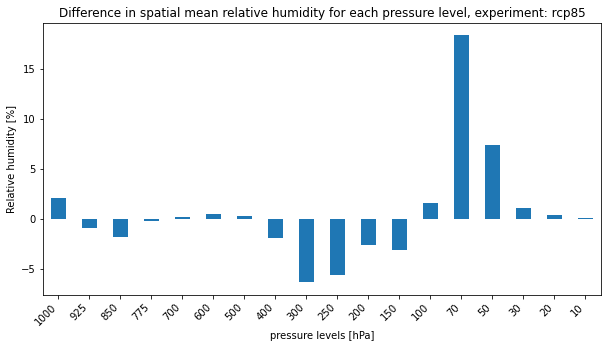

In [85]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))

hur_historical = get_dsvariable(variable, datasets[0], experiment = 'historical', resolution=resolutions[0])['hur'].sel(plev = slice(1500e2, 10e2))
hur_rcp = get_dsvariable(variable, datasets[0], experiment = 'rcp85', resolution=resolutions[0])['hur'].sel(plev = slice(1500e2, 10e2))

hur_diff = xr.DataArray(
    data=hur_rcp.data - hur_historical.data,
    dims=['time', 'plev','lat', 'lon'],
    coords={'time':hur_historical.time.data, 'plev':hur_historical.plev.data, 'lat': hur_historical.lat.data, 'lon': hur_historical.lon.data}
    )

hur_diff.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('Difference in spatial mean relative humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hur'].plev.sel(plev = slice(1500e2, 10e2)).values/100).astype(int), rotation=45, ha='right')
plt.show()

In [86]:
# As there are many missing values over land for 1000 hpa and 925 hpa, we can take the mass weighted mean of the relative humidity of 850 hpa and higher, 
# since it is only the mountains that are missing from those levels

In [87]:
hur = ds['hur'].sel(plev=slice(850e2,0))
hur = (hur * hur.plev).sum(dim='plev') / ds.plev.sum(dim='plev')
hur.attrs['units']= '%'
hur.attrs['Description'] = 'weighted mean relative humidity from 850-0 hpa'
hur

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[16.42575055, 15.11389552, 13.8354469 , ..., 20.51781303,
         19.26686108, 17.84790271],
        [13.84775047, 12.82074174, 12.22946518, ..., 17.75285642,
         16.58470361, 15.22786555],
        [13.42302139, 13.45013504, 13.97185933, ..., 16.33512954,
         15.11229471, 14.01331945],
        ...,
        [13.45212318, 12.98767557, 13.93670331, ..., 16.6888583 ,
         15.39798068, 14.27677315],
        [14.89808946, 14.36782149, 15.31418949, ..., 19.27531641,
         17.79915301, 16.25417932],
        [18.83228432, 18.57088686, 18.97039249, ..., 23.68075971,
         22.62886093, 20.33688409]],

       [[18.55593719, 17.89857162, 16.60357417, ..., 19.88653179,
         19.5372399 , 19.03623798],
        [17.54462029, 15.83740612, 13.7090186 , ..., 20.93930984,
         19.98739503, 18.8983868 ],
        [16.35631447, 14.86859472, 13.82549035, ..., 20.32513449,
         19.18027269, 17.84412761],
...
        [17.65485468, 18.61093838, 20.21577974, ..., 17.9072186 ,
         17.45389842, 17.10114986],
        [17.743615  , 18.76916368, 20.43354069, ..., 18.5423824 ,
         18.07672655, 17.57120896],
        [21.38227184, 22.13718388, 22.49293499, ..., 19.9361152 ,
         20.48134203, 20.88876306]],

       [[20.06310037, 17.49192471, 15.40955106, ..., 30.5745534 ,
         26.88787305, 23.09499475],
        [15.00211358, 13.22026301, 12.01929266, ..., 22.30632708,
         19.10554837, 16.80021198],
        [12.55311561, 11.6070346 , 11.44047323, ..., 16.93270589,
         14.89640466, 13.6385314 ],
        ...,
        [14.89327158, 15.12401819, 16.24384212, ..., 13.3932828 ,
         13.7730825 , 14.32170637],
        [14.99742361, 15.47745527, 16.75954708, ..., 14.07129847,
         14.5069729 , 14.84410806],
        [17.35055011, 18.06711485, 18.56423146, ..., 15.79703386,
         16.97118407, 17.11266922]]])
Coordinates:
  * time     (time) object 2070-01-16 12:00:00 ... 2099-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:        %
    Description:  weighted mean relative humidity from 850-0 hpa

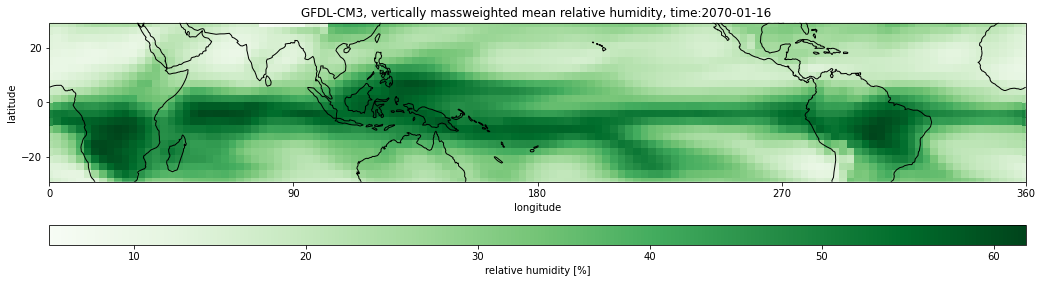

In [88]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hur.isel(time=0)

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', vertically massweighted mean relative humidity, time:' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'relative humidity' + ' [{}]'.format(scene.attrs['units']))

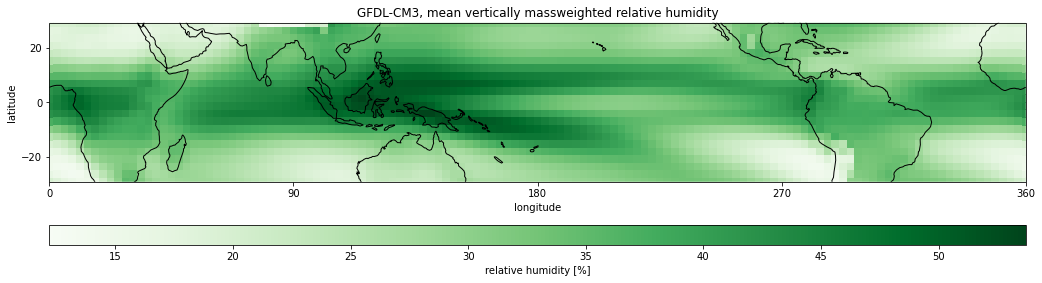

In [89]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hur.mean(dim='time')

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', mean vertically massweighted relative humidity')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'relative humidity' + ' [{}]'.format(hur.attrs['units']))

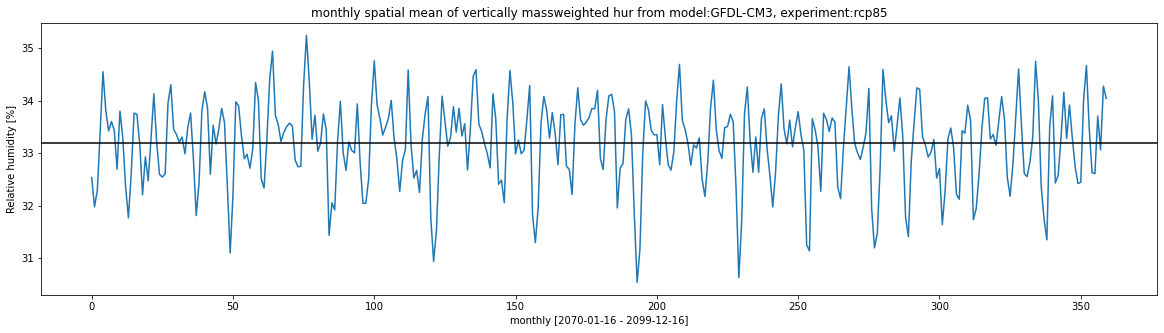

In [90]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly'
    ]

aWeights = np.cos(np.deg2rad(hur.lat))
y= hur.weighted(aWeights).mean(dim=('lat','lon')) 
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], 'vertically massweighted hur', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(hur.isel(time=0).coords['time'].values)[:10], str(hur.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', hur.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [133]:
variable = 'hur'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

experiments =[
    'historical',
    # 'rcp85'
    ]

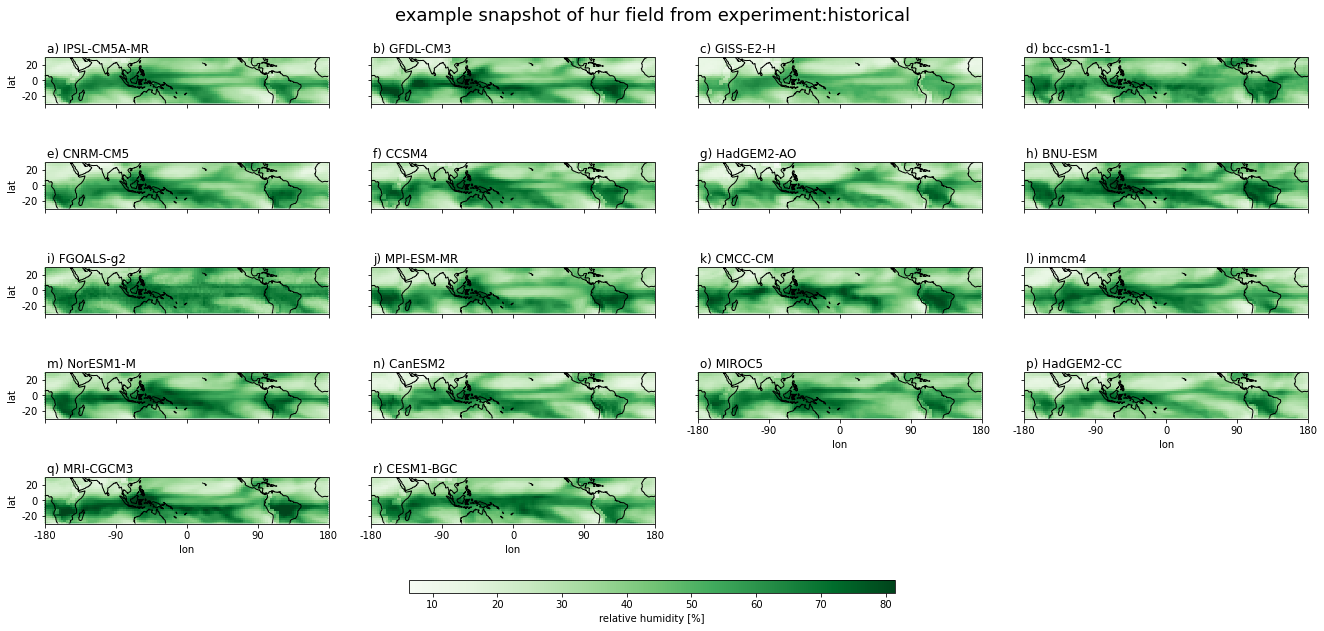

In [101]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.975
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].isel(time=0).sel(plev=slice(850e2,0))
        scene = (scene * scene.plev).sum(dim='plev') / scene.plev.sum(dim='plev')
        scene.attrs['units']= '%'
        scene.attrs['Description'] = 'weighted mean relative humidity from 850-0 hpa'
        y= scene

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format('hur', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].isel(time=0).sel(plev=slice(850e2,0))
    scene = (scene * scene.plev).sum(dim='plev') / scene.plev.sum(dim='plev')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('relative humidity', y.units))

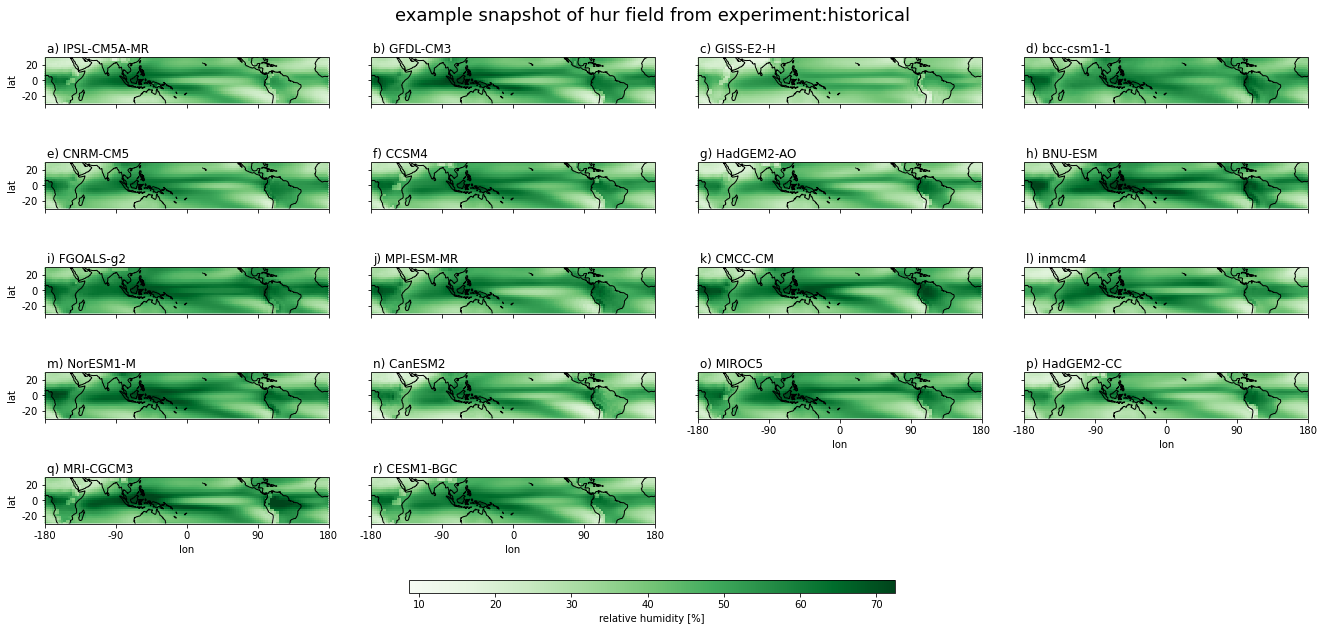

In [102]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.975
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].mean(dim='time').sel(plev=slice(850e2,0))
        scene = (scene * scene.plev).sum(dim='plev') / scene.plev.sum(dim='plev')
        scene.attrs['units']= '%'
        scene.attrs['Description'] = 'weighted mean relative humidity from 850-0 hpa'
        y= scene

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format('hur', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].mean(dim='time').sel(plev=slice(850e2,0))
    scene = (scene * scene.plev).sum(dim='plev') / scene.plev.sum(dim='plev')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('relative humidity', '%'))

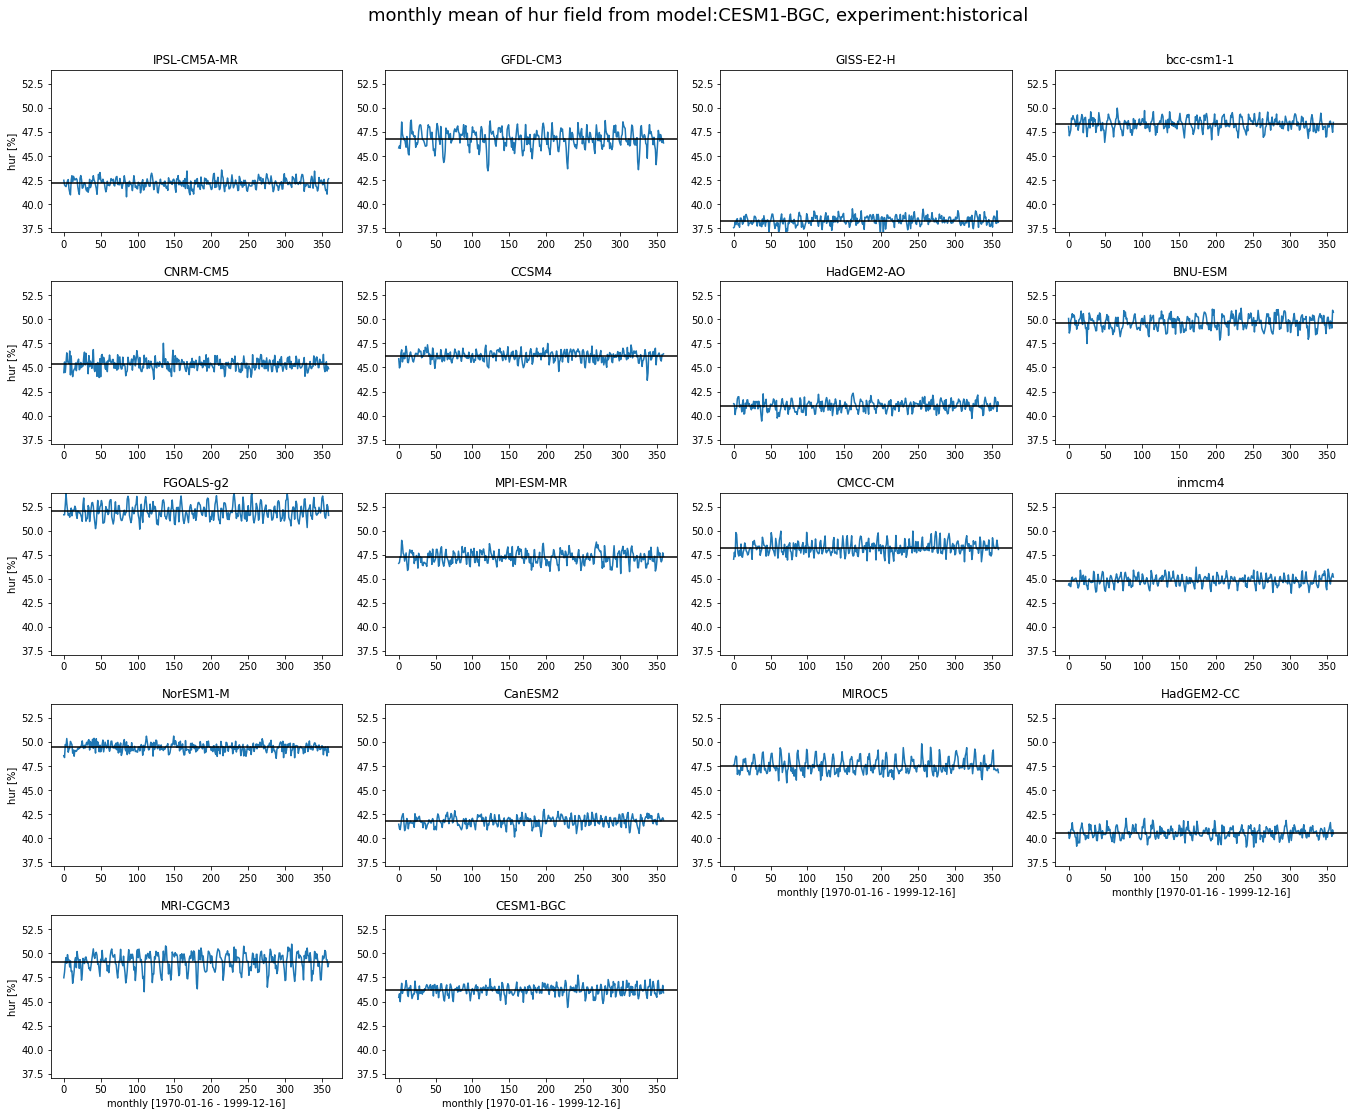

In [107]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].sel(plev=slice(850e2,0))
        data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('lat','lon'))

        data.attrs['units']= '%'
        data.attrs['Description'] = 'weighted mean relative humidity from 850-0 hpa'
        y= data

        if timeMean_options[0] == 'annual':
            y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'seasonal':
            y = y.resample(time='QS-DEC').mean(dim="time")
            y = to_monthly(y)
            y = y.rename({'month':'season'})
            y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
            y = y.isel(year=slice(1, None))

        if timeMean_options[0] == 'monthly':
            y = y.resample(time='M').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'daily':
            y = y

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'hur', dataset, experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].sel(plev=slice(850e2,0))
    data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')
    aWeights = np.cos(np.deg2rad(data.lat))
    data = data.weighted(aWeights).mean(dim=('lat','lon'))

    title = dataset
    ax= fig.add_subplot(5,4,i+1)
    plot_timeseries(data, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format('hur', y.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

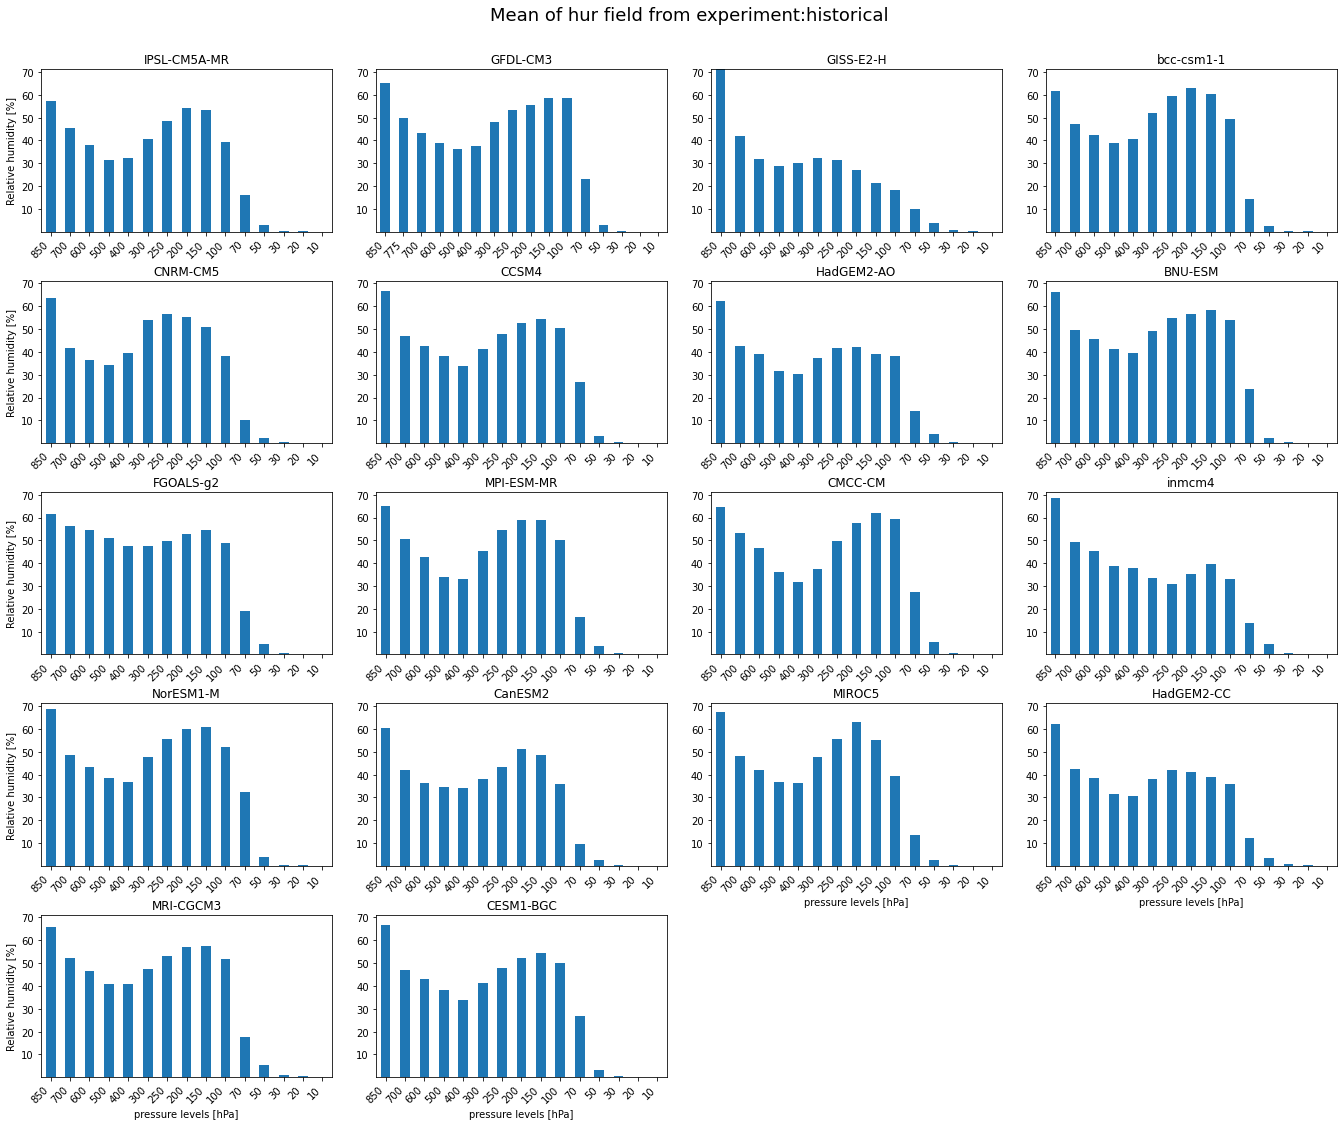

In [134]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].sel(plev=slice(850e2,10e2))
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        data.attrs['units']= '%'
        y= data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Mean of {} field from experiment:{}'.format('hur', experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].sel(plev=slice(850e2,10e2))
    aWeights = np.cos(np.deg2rad(data.lat))

    ax= fig.add_subplot(5,4,i+1)
    data.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data.plev.sel(plev=slice(850e2,10e2)).values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('Relative humidity [%]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

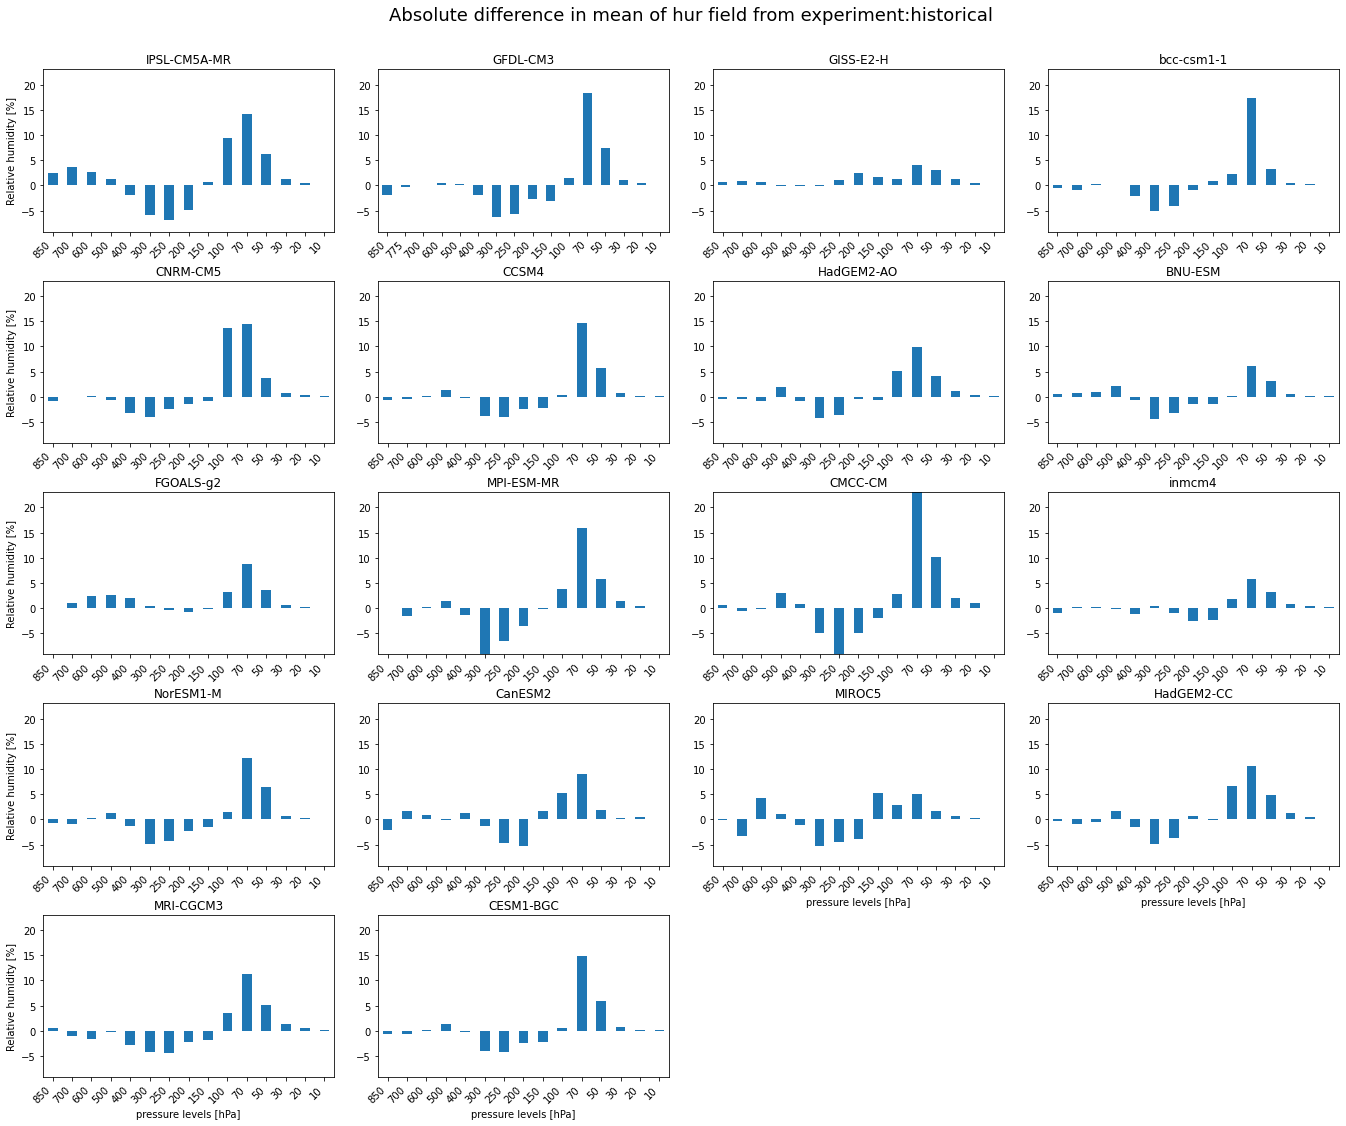

In [140]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])['hur'].sel(plev = slice(850e2, 10e2))
        data_rcp = get_dsvariable(variable, dataset, experiment = 'rcp85', resolution=resolutions[0])['hur'].sel(plev = slice(850e2, 10e2))

        data_diff = xr.DataArray(
            data=data_rcp.data - data_historical.data,
            dims=['time', 'plev','lat', 'lon'],
            coords={'time':data_historical.time.data, 'plev':data_historical.plev.data, 'lat': data_historical.lat.data, 'lon': data_historical.lon.data}
            )

        aWeights = np.cos(np.deg2rad(data_diff.lat))
        data_diff = data_diff.weighted(aWeights).mean(dim=('time','lat','lon'))

        data_diff.attrs['units']= '%'
        y= data_diff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Absolute difference in mean of {} field from experiment:{}'.format('hur', experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data_historical = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])['hur'].sel(plev = slice(850e2, 10e2))
    data_rcp = get_dsvariable(variable, dataset, experiment = 'rcp85', resolution=resolutions[0])['hur'].sel(plev = slice(850e2, 10e2))

    data_diff = xr.DataArray(
        data=data_rcp.data - data_historical.data,
        dims=['time', 'plev','lat', 'lon'],
        coords={'time':data_historical.time.data, 'plev':data_historical.plev.data, 'lat': data_historical.lat.data, 'lon': data_historical.lon.data}
        )

    aWeights = np.cos(np.deg2rad(data_diff.lat))
    # data_diff = data_diff.weighted(aWeights).mean(dim=('time','lat','lon'))

    title = dataset
    ax= fig.add_subplot(5,4,i+1)
    data_diff.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data_historical.plev.sel(plev=slice(850e2,10e2)).values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('Relative humidity [%]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

Text(0, 0.5, 'relative humidity [%]')

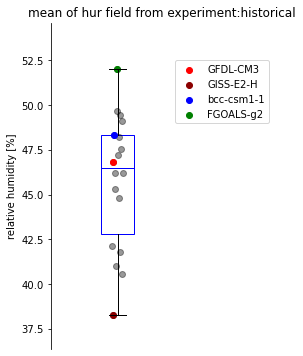

In [149]:
labels =[
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].sel(plev=slice(850e2,0))
        data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        y = data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


plt.figure(figsize=(4,6))
title = 'mean of {} field from experiment:{}'.format(variable, experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hur'].sel(plev=slice(850e2,0))
    data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')
    aWeights = np.cos(np.deg2rad(data.lat))
    data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

    y_data = data

    y = np.append(y, y_data)


plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel('relative humidity [{}]'.format('%'))

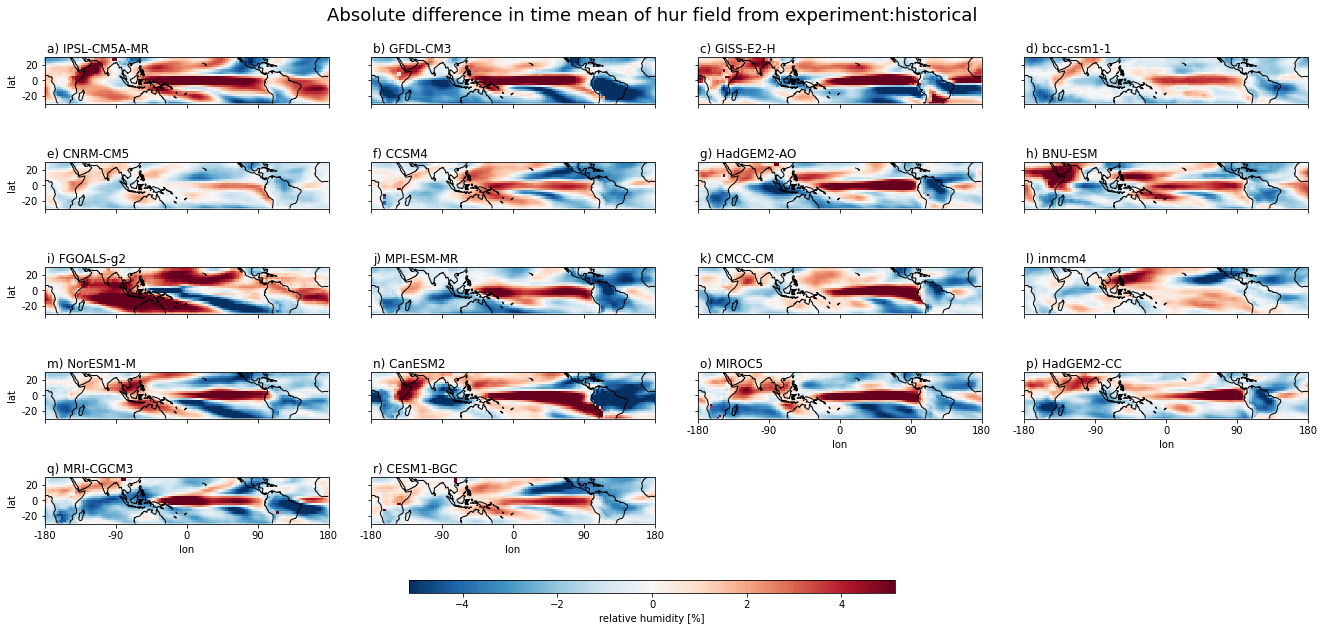

In [152]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].mean(dim='time').sel(plev=slice(850e2,0))
        data_historical = (data_historical * data_historical.plev).sum(dim='plev') / data_historical.plev.sum(dim='plev')

        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].mean(dim='time').sel(plev=slice(850e2,0))
        data_rcp = (data_rcp * data_rcp.plev).sum(dim='plev') / data_rcp.plev.sum(dim='plev')

        # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        
        datadiff = data_rcp - data_historical
        datadiff = (datadiff/data_historical)*100

        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

    vmin = np.append(vmin, np.quantile(y, quantile_low))
    vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Absolute difference in time mean of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].mean(dim='time').sel(plev=slice(850e2,0))
    data_historical = (data_historical * data_historical.plev).sum(dim='plev') / data_historical.plev.sum(dim='plev')

    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].mean(dim='time').sel(plev=slice(850e2,0))
    data_rcp = (data_rcp * data_rcp.plev).sum(dim='plev') / data_rcp.plev.sum(dim='plev')

    # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    
    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff

    y= datadiff
    cmap = 'RdBu_r'

    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('relative humidity', '%'))


Text(0, 0.5, 'relative humidity [%]')

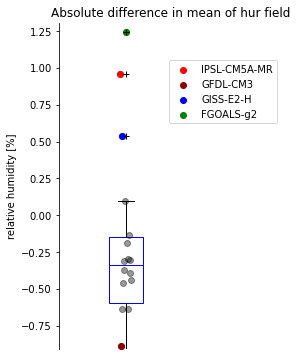

In [158]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].sel(plev=slice(850e2,0))
        data_historical = (data_historical * data_historical.plev).sum(dim='plev') / data_historical.plev.sum(dim='plev')
        aWeights = np.cos(np.deg2rad(data_historical.lat))
        data_historical = data_historical.weighted(aWeights).mean(dim=('time','lat','lon'))


        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].sel(plev=slice(850e2,0))
        data_rcp = (data_rcp * data_rcp.plev).sum(dim='plev') / data_rcp.plev.sum(dim='plev')
        aWeights = np.cos(np.deg2rad(data_rcp.lat))
        data_rcp = data_rcp.weighted(aWeights).mean(dim=('time','lat','lon'))

        # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        
        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(4,6))
title = 'Absolute difference in mean of {} field'.format(variable)
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].sel(plev=slice(850e2,0))
    data_historical = (data_historical * data_historical.plev).sum(dim='plev') / data_historical.plev.sum(dim='plev')
    aWeights = np.cos(np.deg2rad(data_historical.lat))
    data_historical = data_historical.weighted(aWeights).mean(dim=('time','lat','lon'))


    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].sel(plev=slice(850e2,0))
    data_rcp = (data_rcp * data_rcp.plev).sum(dim='plev') / data_rcp.plev.sum(dim='plev')
    aWeights = np.cos(np.deg2rad(data_rcp.lat))
    data_rcp = data_rcp.weighted(aWeights).mean(dim=('time','lat','lon'))

    # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    
    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)

data.attrs['units'] = '% K'+ chr(0x207B) + chr(0x00B9) 
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel('relative humidity [{}]'.format('%'))

In [159]:
data_historical 

<xarray.DataArray ()>
array(46.18633883)